In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
###------------------------------
### global variables
##-----------------
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)

N_SAMPLE  = 1000
NOISE = .2
ALPHA = .1
TEST_SIZE = .2
EPOCHS = 2000 #NO. of itersation used to optimize weights
# input and output directories

params = {'legend.fontsize' : 'medium', 
          'figure.figsize' : (15, 4),
          'axes.labelsize' : 'medium',
          'axes.titlesize' : 'large',
          'xtick.labelsize' : 'medium',
          'ytick.labelsize' : 'medium',
         }


plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

# plt.style.use('seaborn-v0_8-darkgrid')
plt.style.use('ggplot')

In [3]:
X, y = datasets.make_moons(n_samples = N_SAMPLE, # n_samples: how many datasets in it
                          noise = NOISE, # peportion of randommness added to data so that it matched to real life data , without noise it becomes perfect half circle in moon dataset
                          shuffle = True, 
                          random_state = RANDOM_STATE)
X.shape, y.shape

((1000, 2), (1000,))

### EDA
1. plot the data
2. print min max and avg of the dataset


In [5]:
data_df = pd.DataFrame(X, columns = ('A', 'B'))
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


<Axes: xlabel='A', ylabel='B'>

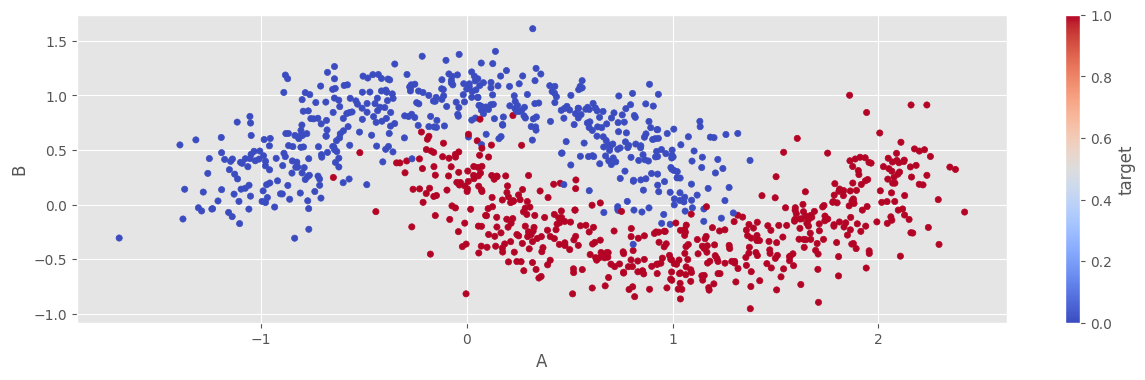

In [6]:
data_df.plot.scatter('A','B',c='target',cmap=CMAP)

In [7]:
data_df.max()

A         2.419113
B         1.612075
target    1.000000
dtype: float64

### predict

In [9]:
def predict(row, wgts): # this function will work as activation function

    z = wgts[0] # wgts[0] is bias

    for i in range(len(row) - 1):
        z += wgts[i + 1] * row[i] # z will work as aggrigation fucnction 
    return 1 if z >= 1 else 0

### split data in test, train

In [11]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
display(data_train.shape) #work in same way as we use last line printing s/s of jupyter
type(data_train)

(900, 3)

numpy.ndarray

In [12]:
rng = np.random.default_rng(seed = RANDOM_STATE)

def train_weights(train, alpha, n_epoch):
    errors = []
    weights = rng.random(data_train.shape[1]) # randomly generating weights for all the features
    m = train.shape[0] # number of samples

    for epoch in range(n_epoch):
        sum_error = 0.0

        for row in train:
            prediction = predict(row, weights) # this function will give us the prediction of our modek i.e y hat(y_pred)
            dz = prediction - row[-1] #finding difference between prediction and target (
            sum_error += (prediction - row[-1])**2 # findin squared error
            weights[0] += - alpha * dz / m # updating bias using gradient decent
            for i in range(len(row) - 1):
                weights[i + 1] += -alpha * row[i] * dz / m #  updating w1, w2, and all the rest of all weights using gradient decent

        errors.append(sum_error / m) # appending sum of average of error to error list
    return errors, weights 

- weights[i + 1] += -alpha * row[i] * dz / m
- - the plot will not converge it will just keep on fluctuating  if not divivded by m(samples)

In [14]:
errors, weights = train_weights(data_train, ALPHA, EPOCHS)


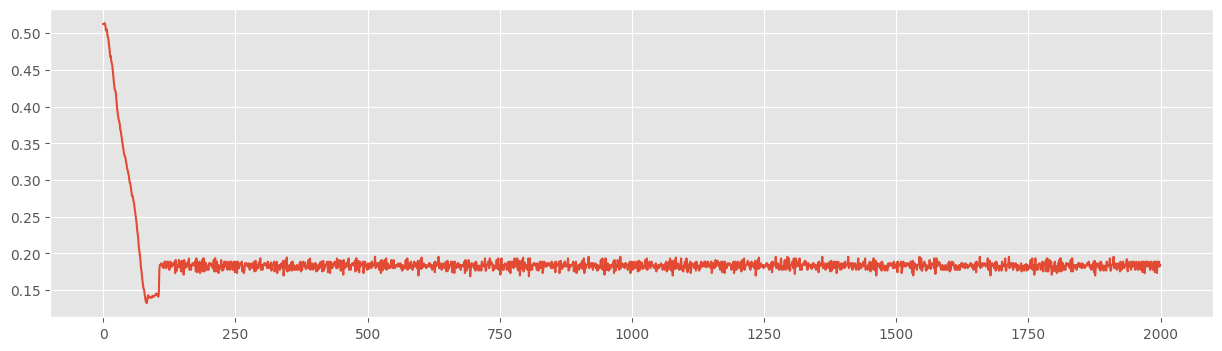

In [15]:
fig, ax = plt.subplots()
ax.plot(errors);

In [16]:
def fn_plot_decision_boundry(wts, X):
    fig, ax = plt.subplots(figsize =(8,5))
    dm=0.01 # spacing of the grid width
    
    #Min and max along two axis
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()

    # generate a mesh grid
    xx,yy = np.meshgrid(np.arange(x_min, x_max, dm),
                       np.arange(y_min, y_max, dm))
    XX = np.c_[xx.ravel(), yy.ravel()]
    XX = np.hstack((XX, np.ones((XX.shape[0],1)))) # just added third column which wil nver be used because till now we had 3 rows so added this so that our code dont break
    y_pred=[]

    for row in XX:
        y_p = predict(row, wts)
        y_pred.append(y_p)

    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx,yy, Z, alpha=0.8, cmap= plt.cm.Paired) # contour f filles the color to the sides without f i.e contour it will just create line  / "filled contour plot".
    ax.scatter(X[:,0], X[:,1], c = X[:,2], edgecolors='k', cmap= CMAP)



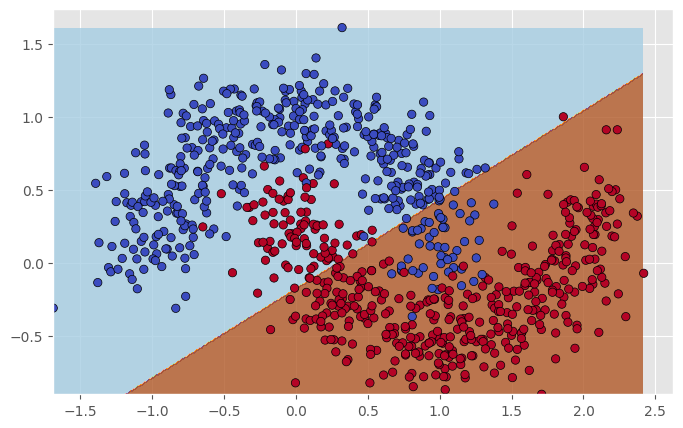

In [17]:
fn_plot_decision_boundry(weights, data_train)

## using sigmoid activation function

In [19]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [75]:
def predict(row, wgts): # this function will work as activation function

    z = wgts[0] # wgts[0] is bias

    for i in range(len(row) - 1): # -1 to exclude the last feature whcih is target
        z += wgts[i + 1] * row[i] # z will work as aggrigation fucnction 
      
    return sigmoid(z)

In [21]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
display(data_train.shape) #work in same way as we use last line printing s/s of jupyter
type(data_train)

(900, 3)

numpy.ndarray

In [22]:
rng = np.random.default_rng(seed = RANDOM_STATE)

def train_weights(train, alpha, n_epoch):
    errors = []
    weights = rng.random(data_train.shape[1])
    m = train.shape[0]

    for epoch in range(n_epoch):
        sum_error = 0.0

        for row in train:
            pred = predict(row, weights)
            # prediction = 1 if pred >= .5 else 0
            dz = pred - row[-1]
            sum_error -= row[-1] * np.log(pred)
            weights[0] += -alpha * dz / m
            for i in range(len(row) - 1):
                weights[i + 1] += -alpha * row[i] * dz / m

        errors.append(sum_error / m)
    return errors, weights

In [23]:
errors, weights = train_weights(data_train, ALPHA, EPOCHS)


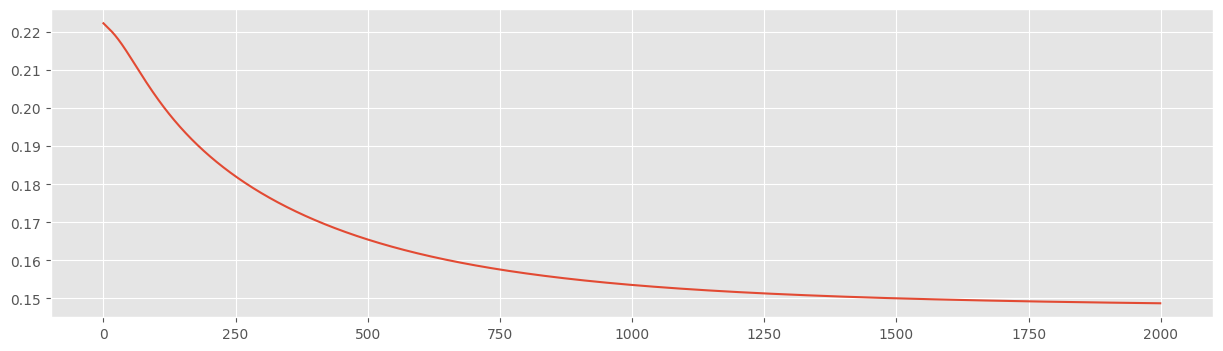

In [24]:
plt.plot(errors)

In [67]:
def fn_plot_decision_boundry(wts, X):
    fig, ax = plt.subplots(figsize =(8,5))
    dm=0.01 # spacing of the grid width
    
    #Min and max along two axis
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()

    # generate a mesh grid
    xx,yy = np.meshgrid(np.arange(x_min, x_max, dm), # creates an array of x-cordinates y no of times
                       np.arange(y_min, y_max, dm)) # creates an array of y-cordinates x no of times
    # Together they create a mesh
    XX = np.c_[xx.ravel(), yy.ravel()]
    XX = np.hstack((XX, np.ones((XX.shape[0],1)))) # just added third column which wil nver be used because till now we had 3 rows so added this so that our code dont break
    y_pred=[]

    for row in XX:
        y_p = predict(row, wts)
        pred = 1 if y_p >= .5 else 0
        y_pred.append(pred)

    Z = np.array(y_pred).reshape(xx.shape)

    ax.contourf(xx,yy, Z, alpha=0.8, cmap= plt.cm.Paired)
    ax.scatter(X[:,0], X[:,1], c = X[:,2], edgecolors='k', cmap= CMAP)


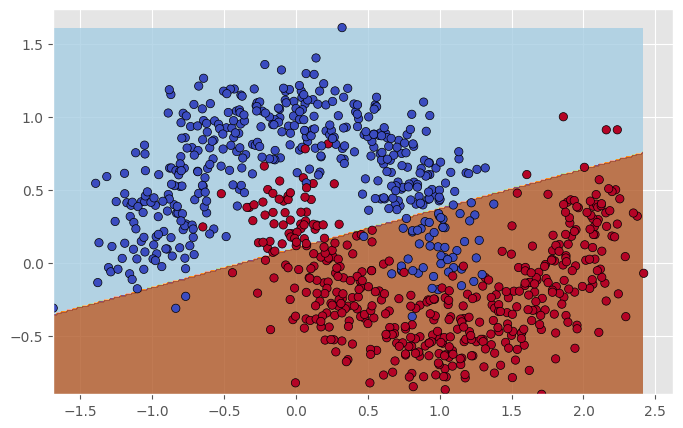

In [69]:
fn_plot_decision_boundry(weights, data_train)

In [71]:
preds= []
for row in data_train:
    a= predict(row, weights)
    y_pred=0
    if a>=0.5 : y_pred=1
    preds.append(y_pred)
accuracy_score(data_train[:,-1], preds)

0.8655555555555555

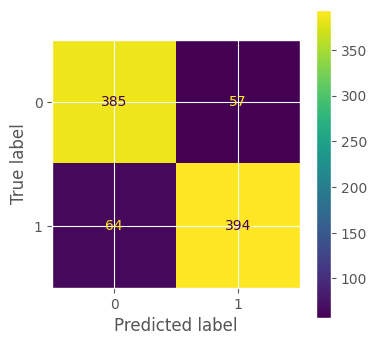

In [95]:
cm = confusion_matrix(data_train[:,-1], preds)
disp= ConfusionMatrixDisplay(cm, display_labels=[0,1])
fig, ax= plt.subplots(figsize=(4,4))
disp.plot(ax=ax)
#Ugly part, bad part : subjective on case basis